In [2]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

A basic analysis on our dataset. I convert the times to minutes and get the split times. I then get the minutes per kilometre pace. I then analyse the performance trends of runners in terms of gender, category, etc. for each year.

In [3]:
df = pd.read_csv('../../data/df_full_08_17.csv', encoding = "ISO-8859-1")

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (12,13,15,16,26,27,35,36,38,39,41,43,45,46,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,...,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1,FR,...,16:06:17,NaN,16:51:13,NaN,NaN,17:20:02,NaN,NaN,18:23:09,19:01:54
1,1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2,ES,...,16:23:16,NaN,17:05:14,NaN,NaN,17:34:21,NaN,NaN,18:39:27,19:16:59
2,2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3,US,...,16:56:16,NaN,17:39:45,NaN,NaN,18:09:03,NaN,NaN,19:17:41,19:53:00
3,3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4,FR,...,17:12:35,NaN,17:55:20,NaN,NaN,18:23:24,NaN,NaN,19:28:04,20:03:39
4,4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5,US,...,17:14:48,NaN,17:52:03,NaN,NaN,18:23:11,NaN,NaN,19:33:35,20:11:38
5,5,5,2017,17,f94453abd655927dc15006974bce67ad,The North Face / Buff,Male,Senior Men (23-39),6,ES,...,17:12:38,NaN,17:57:23,NaN,NaN,18:28:03,NaN,NaN,19:39:00,20:12:43
6,6,6,2017,9,5a376cf8730a72a85ed45ec976ce3ccf,The North Face,Male,Senior Men (23-39),7,US,...,17:11:31,NaN,17:55:42,NaN,NaN,18:27:34,NaN,NaN,19:41:21,20:19:48
7,7,7,2017,13,f9afc937b3b009afc6def5029e0cf169,VIBRAM,Male,Senior Men (23-39),8,LT,...,18:04:53,NaN,18:55:24,NaN,NaN,19:28:09,NaN,NaN,20:44:41,21:24:19
8,8,8,2017,8,bf7a0557fac70cfc49d7d7c67bccf3e7,THE NORTH FACE,Male,Senior Men (23-39),9,US,...,17:45:16,NaN,18:40:38,NaN,NaN,19:26:25,NaN,NaN,20:46:05,21:28:32
9,9,9,2017,32,95871c39869bcf74aa962458a3569c46,COMPRESSPORT,Male,Senior Men (23-39),10,ES,...,18:15:18,NaN,19:04:33,NaN,NaN,19:38:29,NaN,NaN,20:58:28,21:44:31


In [5]:
df = df.drop('Unnamed: 0.1', axis=1)

In [6]:
df.head()

,Unnamed: 0,Year,bib,name_mask,team,gender,category,rank,nationality,time,...,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1,FR,19:01:54,...,16:06:17,NaN,16:51:13,NaN,NaN,17:20:02,NaN,NaN,18:23:09,19:01:54
1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2,ES,19:16:59,...,16:23:16,NaN,17:05:14,NaN,NaN,17:34:21,NaN,NaN,18:39:27,19:16:59
2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3,US,19:53:00,...,16:56:16,NaN,17:39:45,NaN,NaN,18:09:03,NaN,NaN,19:17:41,19:53:00
3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4,FR,20:03:39,...,17:12:35,NaN,17:55:20,NaN,NaN,18:23:24,NaN,NaN,19:28:04,20:03:39
4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5,US,20:11:38,...,17:14:48,NaN,17:52:03,NaN,NaN,18:23:11,NaN,NaN,19:33:35,20:11:38


In [7]:
def minutes(time_str):
    return pd.to_timedelta(time_str).total_seconds()/60

In [8]:
df_non_stage = df[[ 'Unnamed: 0'  ,  'Year', 
'bib'              ,
'name_mask'           ,
'team'           ,
'gender',
'category'        , 
'rank'             ,
'nationality'      
 ]]

In [9]:
stages = df.filter(like='to').applymap(minutes)
times = df.filter(like='time').applymap(minutes)

In [10]:
stages

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,...,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,71.833333,NaN,NaN,105.083333,NaN,161.150000,213.666667,268.116667,293.516667,378.033333,...,966.283333,NaN,1011.216667,NaN,NaN,1040.033333,NaN,NaN,1103.150000,1141.900000
1,70.000000,NaN,NaN,104.350000,NaN,161.016667,213.750000,269.300000,294.650000,378.066667,...,983.266667,NaN,1025.233333,NaN,NaN,1054.350000,NaN,NaN,1119.450000,1156.983333
2,75.400000,NaN,NaN,108.633333,NaN,165.283333,221.833333,281.066667,310.083333,400.850000,...,1016.266667,NaN,1059.750000,NaN,NaN,1089.050000,NaN,NaN,1157.683333,1193.000000
3,71.850000,NaN,NaN,105.133333,NaN,161.183333,213.750000,278.100000,307.383333,401.166667,...,1032.583333,NaN,1075.333333,NaN,NaN,1103.400000,NaN,NaN,1168.066667,1203.650000
4,69.983333,NaN,NaN,102.250000,NaN,159.750000,213.333333,267.716667,293.083333,378.050000,...,1034.800000,NaN,1072.050000,NaN,NaN,1103.183333,NaN,NaN,1173.583333,1211.633333
5,73.266667,NaN,NaN,106.766667,NaN,163.950000,217.216667,275.916667,304.883333,394.633333,...,1032.633333,NaN,1077.383333,NaN,NaN,1108.050000,NaN,NaN,1179.000000,1212.716667
6,74.300000,NaN,NaN,109.000000,NaN,166.366667,221.833333,281.033333,310.416667,400.483333,...,1031.516667,NaN,1075.700000,NaN,NaN,1107.566667,NaN,NaN,1181.350000,1219.800000
7,74.233333,NaN,NaN,108.350000,NaN,164.816667,216.200000,277.850000,307.683333,398.133333,...,1084.883333,NaN,1135.400000,NaN,NaN,1168.150000,NaN,NaN,1244.683333,1284.316667
8,69.950000,NaN,NaN,107.800000,NaN,163.583333,216.533333,273.200000,304.450000,391.233333,...,1065.266667,NaN,1120.633333,NaN,NaN,1166.416667,NaN,NaN,1246.083333,1288.533333
9,75.466667,NaN,NaN,108.400000,NaN,165.166667,220.733333,280.900000,309.700000,406.450000,...,1095.300000,NaN,1144.550000,NaN,NaN,1178.483333,NaN,NaN,1258.466667,1304.516667


In [11]:
times

,time,timediff
0,1141.900000,0.000000
1,1156.983333,15.083333
2,1193.000000,51.100000
3,1203.650000,61.750000
4,1211.633333,69.733333
5,1212.716667,70.816667
6,1219.800000,77.900000
7,1284.316667,142.416667
8,1288.533333,146.633333
9,1304.516667,162.616667


In [12]:
df1 = df_non_stage.join(times)

In [13]:
df1 = df1.join(stages)

In [14]:
df1.head()


,Unnamed: 0,Year,bib,name_mask,team,gender,category,rank,nationality,time,...,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0,2017,4,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),1,FR,1141.900000,...,966.283333,NaN,1011.216667,NaN,NaN,1040.033333,NaN,NaN,1103.150000,1141.900000
1,1,2017,2,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),2,ES,1156.983333,...,983.266667,NaN,1025.233333,NaN,NaN,1054.350000,NaN,NaN,1119.450000,1156.983333
2,2,2017,14,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3,US,1193.000000,...,1016.266667,NaN,1059.750000,NaN,NaN,1089.050000,NaN,NaN,1157.683333,1193.000000
3,3,2017,7,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4,FR,1203.650000,...,1032.583333,NaN,1075.333333,NaN,NaN,1103.400000,NaN,NaN,1168.066667,1203.650000
4,4,2017,1,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5,US,1211.633333,...,1034.800000,NaN,1072.050000,NaN,NaN,1103.183333,NaN,NaN,1173.583333,1211.633333


In [15]:
df1.to_csv('df_cumm_mins')

In [16]:
orig_cols = df1.columns 

In [17]:
df1.columns

Index(['Unnamed: 0', 'Year', 'bib', 'name_mask', 'team', 'gender', 'category',
       'rank', 'nationality', 'time', 'timediff', 'Chamonix to Delevret',
       'Chamonix to La Charme', 'Chamonix to St-Gervais',
       'Delevret to St-Gervais', 'La Charme to St-Gervais',
       'St-Gervais to Contamines', 'Contamines to La Balme',
       'La Balme to Bonhomme', 'Bonhomme to Chapieux',
       'Chapieux to Col Seigne', 'Col Seigne to Lac Combal',
       'Lac Combal to Mt-Favre', 'Mt-Favre to Checruit',
       'Checruit to Courmayeur', 'Courmayeur to Courmayeur2',
       'Courmayeur2 to Bertone', 'Courmayeur to Bertone', 'Bertone to Bonatti',
       'Bonatti to Arnouvaz', 'Arnouvaz to Col Ferret',
       'Col Ferret to La Fouly', 'La Fouly to Champex La',
       'Champex La to Bovine', 'Champex La to Mortigny', 'Champex La to Giete',
       'Bovine to Trient', 'Mortigny to Trient', 'Giete to Trient',
       'Trient to La Catogne', 'Trient to Les Tseppe',
       'La Catogne to Vallorcine', 

In [18]:
df2 = stages.where(stages.isnull(), 
                stages.fillna(method='ffill', axis=1).diff(axis=1))
df2.update(stages.where(stages.notnull().cumsum(1).cumsum(1) == 1))

In [19]:
df2.head()

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,...,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,71.833333,NaN,NaN,33.250000,NaN,56.066667,52.516667,54.450000,25.400000,84.516667,...,41.300000,NaN,44.933333,NaN,NaN,28.816667,NaN,NaN,63.116667,38.750000
1,70.000000,NaN,NaN,34.350000,NaN,56.666667,52.733333,55.550000,25.350000,83.416667,...,41.900000,NaN,41.966667,NaN,NaN,29.116667,NaN,NaN,65.100000,37.533333
2,75.400000,NaN,NaN,33.233333,NaN,56.650000,56.550000,59.233333,29.016667,90.766667,...,44.266667,NaN,43.483333,NaN,NaN,29.300000,NaN,NaN,68.633333,35.316667
3,71.850000,NaN,NaN,33.283333,NaN,56.050000,52.566667,64.350000,29.283333,93.783333,...,43.700000,NaN,42.750000,NaN,NaN,28.066667,NaN,NaN,64.666667,35.583333
4,69.983333,NaN,NaN,32.266667,NaN,57.500000,53.583333,54.383333,25.366667,84.966667,...,39.266667,NaN,37.250000,NaN,NaN,31.133333,NaN,NaN,70.400000,38.050000


In [20]:
neg_mins = df2[(df2<0).any(axis=1)]
neg_mins.shape

(97, 39)

In [21]:
df2 = df2.filter(like='to').abs()

In [22]:
df2.head()

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,...,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,71.833333,NaN,NaN,33.250000,NaN,56.066667,52.516667,54.450000,25.400000,84.516667,...,41.300000,NaN,44.933333,NaN,NaN,28.816667,NaN,NaN,63.116667,38.750000
1,70.000000,NaN,NaN,34.350000,NaN,56.666667,52.733333,55.550000,25.350000,83.416667,...,41.900000,NaN,41.966667,NaN,NaN,29.116667,NaN,NaN,65.100000,37.533333
2,75.400000,NaN,NaN,33.233333,NaN,56.650000,56.550000,59.233333,29.016667,90.766667,...,44.266667,NaN,43.483333,NaN,NaN,29.300000,NaN,NaN,68.633333,35.316667
3,71.850000,NaN,NaN,33.283333,NaN,56.050000,52.566667,64.350000,29.283333,93.783333,...,43.700000,NaN,42.750000,NaN,NaN,28.066667,NaN,NaN,64.666667,35.583333
4,69.983333,NaN,NaN,32.266667,NaN,57.500000,53.583333,54.383333,25.366667,84.966667,...,39.266667,NaN,37.250000,NaN,NaN,31.133333,NaN,NaN,70.400000,38.050000


In [23]:
neg_mins = df2[(df2<0).any(axis=1)]
neg_mins.shape

(0, 39)

In [24]:
df2 = df_non_stage.join(df2)

In [25]:
df2 = df2.join(times)

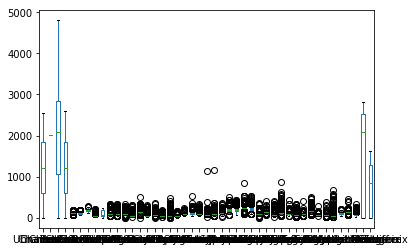

In [26]:
plotty = df2.plot.box()


In [27]:
df2.to_csv('../../data/race_in_mins.csv')

# Pace per kilometre

Divide each stage time by it's distance and this gives us the kilometres per minute time. 

1km_Stage_Pace = Stage_Time / Stage_Distance

In [28]:
df2['Chamonix to Delevret'] =  df2['Chamonix to Delevret'] /13.6  
#df2['Chamonix to Col de Voza'] = df2['Chamonix to Col de Voza'] / 11.8
df2['Chamonix to La Charme']  =  df2['Chamonix to La Charme'] /23 
df2['Chamonix to St-Gervais' ]  =  df2['Chamonix to St-Gervais' ] / 21.5      
df2['Delevret to St-Gervais'] =    df2['Delevret to St-Gervais']/ 7.6 
#df2['Col de Voza to Contamines']  =   df2['Col de Voza to Contamines']   /10.8    
df2['La Charme to St-Gervais'] =  df2['La Charme to St-Gervais']/ 6      
df2['St-Gervais to Contamines' ] =   df2['St-Gervais to Contamines' ]  / 10.3       
df2['Contamines to La Balme']  =    df2['Contamines to La Balme'] / 8.1        
#df2['Contamines to Bonhomme']   =    df2['Contamines to Bonhomme']  /13.4     
df2['La Balme to Bonhomme'    ]  = df2['La Balme to Bonhomme'    ]  /5.5    
#df2['La Balme to Chapieux'   ]   = df2['La Balme to Chapieux'   ]  / 9    
df2['Bonhomme to Chapieux'     ]  = df2['Bonhomme to Chapieux'     ]   / 5.1   
df2['Chapieux to Col Seigne'    ]  = df2['Chapieux to Col Seigne'    ] / 10.3       
#df2['Col Seigne to Refuge Elisabeth' ]  = df2['Col Seigne to Refuge Elisabeth' ] /2.2        
df2['Col Seigne to Lac Combal' ]   = df2['Col Seigne to Lac Combal' ]  / 4.9      
#df2['Col Seigne to Mt-Favre' ]  = df2['Col Seigne to Mt-Favre' ]   / 6.6       
#df2['Refuge Elisabeth to Mt-Favre']  = df2['Refuge Elisabeth to Mt-Favre']  / 5.4        
#df2['Refuge Elisabeth to Checruit' ]  = df2['Refuge Elisabeth to Checruit' ]  /12.2      
df2['Lac Combal to Mt-Favre']   = df2['Lac Combal to Mt-Favre']  / 4       
df2['Mt-Favre to Checruit']   = df2['Mt-Favre to Checruit'] / 4.5     
#df2['Mt-Favre to Courmayeur']   = df2['Mt-Favre to Courmayeur']  /7.6      
df2['Checruit to Courmayeur']   = df2['Checruit to Courmayeur']  / 4.1      
df2['Courmayeur to Courmayeur2']  = df2['Courmayeur to Courmayeur2']  / 0.9                
df2['Courmayeur2 to Bertone'] = df2['Courmayeur2 to Bertone'] / 4         
df2['Courmayeur to Bertone']  = df2['Courmayeur to Bertone'] /4.9            
#df2['Bertone to Refuge Elena']     = df2['Bertone to Refuge Elena']  / 18.8     
df2['Bertone to Bonatti']    = df2['Bertone to Bonatti']  / 7.4      
#df2['Refuge Elena to Col Ferret']  = df2['Refuge Elena to Col Ferret'] / 4         
df2['Bonatti to Arnouvaz']   = df2['Bonatti to Arnouvaz']  / 5.2     
df2['Arnouvaz to Col Ferret'] = df2['Arnouvaz to Col Ferret'] / 4.5         
#df2['Col Ferret to La Peulaz']   = df2['Col Ferret to La Peulaz']  / 3.7       
df2['Col Ferret to La Fouly' ]   = df2['Col Ferret to La Fouly' ] / 10     
#df2['La Peulaz to La Fouly']   = df2['La Peulaz to La Fouly'] / 4.5        
#df2['La Fouly to Praz de Fort']  = df2['La Fouly to Praz de Fort'] / 7.4    
df2['La Fouly to Champex La']  = df2['La Fouly to Champex La']  / 14      
#df2['Praz de Fort to Champex La']  = df2['Praz de Fort to Champex La'] / 11.2       
#df2['Praz de Fort to Champex den Bas'] =df2['Praz de Fort to Champex den Bas'] / 14.3 
df2['Champex La to Bovine' ]    = df2['Champex La to Bovine' ]  / 9.9    
df2['Champex La to Mortigny' ]  = df2['Champex La to Mortigny' ] / 13.7      
df2['Champex La to Giete'  ]   =  df2['Champex La to Giete'  ] / 11.3   
#df2['Champex den Bas to Bovine']   =df2['Champex den Bas to Bovine']   / 6.2    
df2['Bovine to Trient' ]   = df2['Bovine to Trient' ]  / 6.3      
df2['Mortigny to Trient']  = df2['Mortigny to Trient']  / 7.8        
df2['Giete to Trient']  = df2['Giete to Trient']  / 4.9        
df2['Trient to La Catogne' ]   = df2['Trient to La Catogne' ]   / 5.3     
df2['Trient to Les Tseppe' ]  = df2['Trient to Les Tseppe' ]   / 4.8      
#df2['Trient to Vallorcine' ]  = df2['Trient to Vallorcine' ]  / 10.4      
df2['La Catogne to Vallorcine' ]  = df2['La Catogne to Vallorcine' ]  / 6       
df2['Les Tseppe to Vallorcine']  =  df2['Les Tseppe to Vallorcine'] /   5.8     
#df2['Vallorcine to La Gardes']   = df2['Vallorcine to La Gardes']  / 8       
df2['Vallorcine to Tete aux Vents']   = df2['Vallorcine to Tete aux Vents']   / 7.7      
df2['Vallorcine to Argentiere' ]  = df2['Vallorcine to Argentiere' ]  / 6.3       
df2['Vallorcine to Col Montet' ]   = df2['Vallorcine to Col Montet' ]  / 3.7     
#df2['La Gardes to Chamonix']  = df2['La Gardes to Chamonix']   / 7      
df2['Tete aux Vents to Flegere' ]    = df2['Tete aux Vents to Flegere' ]   / 3.3    
df2['Argentiere to Chamonix'] = df2['Argentiere to Chamonix']  / 8.7    
df2['Col Montet to Flegere']  = df2['Col Montet to Flegere']  / 7     
df2['Flegere to Chamonix' ]  = df2['Flegere to Chamonix' ]  / 7.4

In [29]:
df2.describe()

,Unnamed: 0,Year,bib,rank,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,...,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff
count,19579.000000,19579.000000,19579.000000,19579.000000,14876.000000,1423.000000,2281.000000,14866.000000,2172.000000,19202.000000,...,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000,19579.000000,19579.000000
mean,1224.977374,2012.979315,2036.785178,1226.025742,8.860693,5.390258,8.442399,7.749002,18.299180,10.274425,...,17.651536,21.738100,12.681757,20.469862,15.951837,12.856110,19.354039,11.424339,1443.186564,691.507849
std,709.584980,3.046115,1152.849681,709.752435,1.161047,1.259498,1.167556,1.594201,12.443302,2.065282,...,3.556821,3.637283,2.659660,5.634988,6.430893,2.909855,3.348711,2.967314,1191.771290,609.665033
min,0.000000,2008.000000,1.000000,1.000000,5.143382,3.334058,5.311628,4.241228,0.008333,5.391586,...,6.422414,9.326840,5.968254,7.585586,5.459596,5.886973,9.016667,4.412162,0.000000,0.000000
25%,611.000000,2011.000000,1064.000000,612.000000,8.145833,4.539493,7.622481,6.664474,8.074306,9.046926,...,15.686063,19.768398,10.906746,17.563063,13.712121,10.599617,17.658929,9.315315,0.000000,0.000000
50%,1223.000000,2014.000000,2096.000000,1224.000000,8.975490,5.142029,8.519380,7.692982,11.137500,10.286408,...,17.949713,21.818182,12.505291,19.934685,15.545455,12.578544,19.472619,11.168919,2089.133333,847.766667
75%,1835.000000,2016.000000,2833.000000,1836.000000,9.677696,5.850362,9.325581,8.707785,32.231944,11.320388,...,19.579023,23.709957,14.000661,22.751126,17.530303,14.988506,20.935714,13.148649,2529.741667,1286.000000
max,2560.000000,2017.000000,4804.000000,2600.000000,14.268382,8.779710,13.222481,28.407895,41.408333,32.103560,...,70.071839,66.943723,45.320106,105.072072,207.282828,24.429119,64.430952,44.468468,2828.583333,1633.483333


In [30]:
df2.iloc[0]

Unnamed: 0                                                     0
Year                                                        2017
bib                                                            4
name_mask                       7efc0cb7e70d7cd9da46a58bbf01af66
team                                                     Salomon
gender                                                      Male
category                                      Senior Men (23-39)
rank                                                           1
nationality                                                   FR
Chamonix to Delevret                                     5.28186
Chamonix to La Charme                                        NaN
Chamonix to St-Gervais                                       NaN
Delevret to St-Gervais                                     4.375
La Charme to St-Gervais                                      NaN
St-Gervais to Contamines                                 5.44337
Contamines to La Balme   

In [31]:
df2.describe()

,Unnamed: 0,Year,bib,rank,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,...,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff
count,19579.000000,19579.000000,19579.000000,19579.000000,14876.000000,1423.000000,2281.000000,14866.000000,2172.000000,19202.000000,...,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000,19579.000000,19579.000000
mean,1224.977374,2012.979315,2036.785178,1226.025742,8.860693,5.390258,8.442399,7.749002,18.299180,10.274425,...,17.651536,21.738100,12.681757,20.469862,15.951837,12.856110,19.354039,11.424339,1443.186564,691.507849
std,709.584980,3.046115,1152.849681,709.752435,1.161047,1.259498,1.167556,1.594201,12.443302,2.065282,...,3.556821,3.637283,2.659660,5.634988,6.430893,2.909855,3.348711,2.967314,1191.771290,609.665033
min,0.000000,2008.000000,1.000000,1.000000,5.143382,3.334058,5.311628,4.241228,0.008333,5.391586,...,6.422414,9.326840,5.968254,7.585586,5.459596,5.886973,9.016667,4.412162,0.000000,0.000000
25%,611.000000,2011.000000,1064.000000,612.000000,8.145833,4.539493,7.622481,6.664474,8.074306,9.046926,...,15.686063,19.768398,10.906746,17.563063,13.712121,10.599617,17.658929,9.315315,0.000000,0.000000
50%,1223.000000,2014.000000,2096.000000,1224.000000,8.975490,5.142029,8.519380,7.692982,11.137500,10.286408,...,17.949713,21.818182,12.505291,19.934685,15.545455,12.578544,19.472619,11.168919,2089.133333,847.766667
75%,1835.000000,2016.000000,2833.000000,1836.000000,9.677696,5.850362,9.325581,8.707785,32.231944,11.320388,...,19.579023,23.709957,14.000661,22.751126,17.530303,14.988506,20.935714,13.148649,2529.741667,1286.000000
max,2560.000000,2017.000000,4804.000000,2600.000000,14.268382,8.779710,13.222481,28.407895,41.408333,32.103560,...,70.071839,66.943723,45.320106,105.072072,207.282828,24.429119,64.430952,44.468468,2828.583333,1633.483333


In [32]:
df2 = df2[df2 > 2.2]  

In [33]:
pd.set_option('display.max_columns', None)
df2.describe()

,Unnamed: 0,Year,bib,rank,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff
count,19555.000000,19579.000000,19565.000000,19562.000000,14876.000000,1423.000000,2281.000000,14866.000000,2090.000000,19202.000000,18400.000000,18257.000000,18279.000000,17545.000000,17487.000000,16950.000000,16804.000000,16920.000000,4154.000000,1993.000000,13413.000000,15222.000000,15098.000000,14121.000000,14070.000000,12955.000000,4498.000000,1189.000000,6586.000000,4478.000000,1171.000000,6576.000000,10279.000000,1702.000000,10286.000000,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000,11838.000000,11830.000000
mean,1226.479570,2012.979315,2038.241554,1227.089868,8.860693,5.390258,8.442399,7.749002,18.980039,10.274425,12.891008,18.118840,10.615393,14.980891,12.528991,19.106947,10.151080,12.286169,43.965495,23.409822,25.920556,12.892243,13.605932,23.330480,11.141630,13.752265,19.167294,18.028043,19.522801,16.025499,18.548242,14.197966,23.899788,21.637136,12.496944,17.651536,21.738100,12.681757,20.469862,15.951837,12.856110,19.354039,11.424339,2386.902326,1144.465948
std,708.722677,3.046115,1151.975282,709.141803,1.161047,1.259498,1.167556,1.594201,12.190697,2.065282,2.389991,2.990173,2.800836,2.395611,5.806056,3.672273,2.279524,3.911494,23.416587,4.833253,5.803118,2.613901,3.546067,4.862804,2.628664,2.751522,4.382331,3.673765,4.030858,3.738855,2.757363,4.172459,5.422542,5.516023,2.972768,3.556821,3.637283,2.659660,5.634988,6.430893,2.909855,3.348711,2.967314,310.502667,311.033740
min,3.000000,2008.000000,3.000000,3.000000,5.143382,3.334058,5.311628,4.241228,2.211111,5.391586,6.343621,2.475758,3.261438,6.865696,2.214286,6.125000,2.940741,2.804878,2.203704,13.583333,10.649660,6.538288,5.118590,11.570370,5.008333,5.707143,7.895623,7.541363,7.756637,4.687831,10.314103,4.996599,10.707547,8.180556,5.041667,6.422414,9.326840,5.968254,7.585586,5.459596,5.886973,9.016667,4.412162,1141.900000,8.783333
25%,614.000000,2011.000000,1066.000000,614.000000,8.145833,4.539493,7.622481,6.664474,8.295139,9.046926,11.390947,16.254545,8.852941,13.469256,8.697279,16.945833,8.755556,10.207317,27.916667,20.233333,21.802721,11.085586,11.628205,20.474074,9.447083,11.808929,15.906566,16.447689,16.803466,13.650794,17.120726,11.855442,20.795597,18.302083,10.847222,15.686063,19.768398,10.906746,17.563063,13.712121,10.599617,17.658929,9.315315,2218.958333,971.758333
50%,1225.000000,2014.000000,2097.000000,1225.000000,8.975490,5.142029,8.519380,7.692982,11.661111,10.286408,12.899177,18.103030,10.316993,15.040453,10.326531,19.033333,9.951852,11.882114,42.527778,22.570833,26.190476,12.819820,13.541667,23.181481,10.942500,13.805952,19.391414,18.122871,19.844395,16.476190,18.425214,14.304422,23.713836,21.397569,12.500000,17.949713,21.818182,12.505291,19.934685,15.545455,12.578544,19.472619,11.168919,2466.708333,1219.833333
75%,1836.000000,2016.000000,2834.000000,1837.000000,9.677696,5.850362,9.325581,8.707785,32.454167,11.320388,14.317387,19.787879,11.934641,16.441748,15.687075,20.979167,11.200000,13.569106,57.995370,25.487500,29.738095,14.350788,15.157051,25.785185,12.381250,15.705952,21.962963,19.658151,22.2123

In [34]:
#df2['Col de Voza to Contamines'] = df2[df2['Col de Voza to Contamines'] >= 3]

In [35]:
#df2['La Balme to Bonhomme'] = df2[df2['La Balme to Bonhomme'] >= 3]

In [36]:
#df2['Chapieux to Col Seigne'] = df2[df2['Chapieux to Col Seigne'] >= 3]

In [37]:
#df2['Col Seigne to Lac Combal'] = df2[df2['Col Seigne to Lac Combal'] >= 3]

In [38]:
#df2['Lac Combal to Mt-Favre'] = df2[df2['Lac Combal to Mt-Favre'] >= 3]

In [39]:
#df2['Bonatti to Arnouvaz'] = df2[df2['Bonatti to Arnouvaz'] >= 3]

In [40]:
#df2['Col Ferret to La Fouly'] = df2[df2['Col Ferret to La Fouly'] >= 3]

In [41]:
#df2['La Peulaz to La Fouly'] = df2[df2['La Peulaz to La Fouly'] >= 3]

In [42]:
#df2['Bovine to Trient'] = df2[df2['Bovine to Trient'] >= 3]

In [43]:
#df2['La Charme to St-Gervais'] = df2[df2['La Charme to St-Gervais'] >= 3]

In [44]:
#df2['Col Seigne to Refuge Elisabeth'] = df2[df2['Col Seigne to Refuge Elisabeth'] >= 3]

In [45]:
#df2['Checruit to Courmayeur'] = df2[df2['Checruit to Courmayeur'] >= 3]

In [46]:
#df2['Courmayeur to Courmayeur2'] = df2[df2['Courmayeur to Courmayeur2'] >= 3]

## Average pace per race

In [47]:
df2['AVG_Pace'] = df2.filter(like='to').mean(axis = 1)

In [48]:
df2.head()

,Unnamed: 0,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),NaN,FR,5.281863,NaN,NaN,4.375000,NaN,5.443366,6.483539,9.900000,4.980392,8.205502,4.044218,9.433333,5.237037,5.646341,NaN,NaN,10.649660,6.691441,6.487179,11.881481,5.323333,5.707143,NaN,NaN,8.030973,NaN,NaN,6.102041,NaN,8.604167,NaN,7.747126,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),NaN,ES,5.147059,NaN,NaN,4.519737,NaN,5.501618,6.510288,10.100000,4.970588,8.098706,4.047619,9.429167,5.255556,5.743902,NaN,NaN,11.159864,6.887387,6.810897,12.225926,5.376667,5.800000,NaN,NaN,8.781711,NaN,NaN,5.768707,NaN,8.729167,NaN,7.235632,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,5.544118,NaN,NaN,4.372807,NaN,5.500000,6.981481,10.769697,5.689542,8.812298,4.452381,10.020833,5.629630,6.292683,NaN,NaN,11.411565,6.979730,6.519231,NaN,11.085000,5.870238,NaN,NaN,8.631268,NaN,NaN,5.323129,NaN,9.222222,NaN,7.497126,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,5.283088,NaN,NaN,4.379386,NaN,5.441748,6.489712,11.700000,5.741830,9.105178,4.812925,10.220833,5.677778,6.516260,NaN,NaN,12.340136,7.243243,7.243590,13.255556,5.170000,5.839286,NaN,NaN,8.510324,NaN,NaN,6.119048,NaN,9.104167,NaN,7.370690,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,5.145833,NaN,NaN,4.245614,NaN,5.582524,6.615226,9.887879,4.973856,8.249191,3.901361,8.366667,5.162963,6.024390,NaN,NaN,10.870748,7.063063,6.448718,11.896296,5.868333,7.513095,NaN,NaN,12.036873,NaN,NaN,4.996599,NaN,8.180556,NaN,6.422414,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069


## Gender Pacing

In [49]:
df2.groupby(['gender'])['AVG_Pace'].mean()


gender
Female    14.977206
Male      14.643738
Name: AVG_Pace, dtype: float64

Text(0.5,0,'Gender')

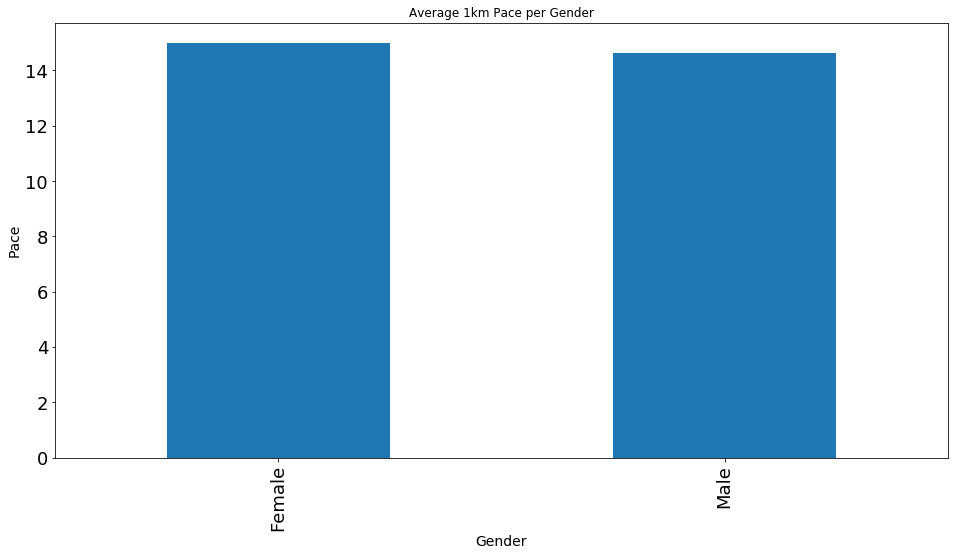

In [50]:
gen = df2.groupby(['gender'])['AVG_Pace'].mean()
ax = gen.plot.bar(figsize=(16, 8), title='Average 1km Pace per Gender', fontsize=18)
ax.set_ylabel('Pace', fontsize = 14)
ax.set_xlabel('Gender', fontsize = 14)

In [51]:
df2.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()

gender,Female,Male
Year,,
2008,15.963855,15.268551
2009,15.284048,14.556426
2011,14.048477,13.911457
2013,14.490960,14.111441
2014,14.665532,14.172772
2015,15.411888,15.326217
2016,15.478393,15.325801
2017,14.518917,14.418069


Text(0.5,0,'Gender')

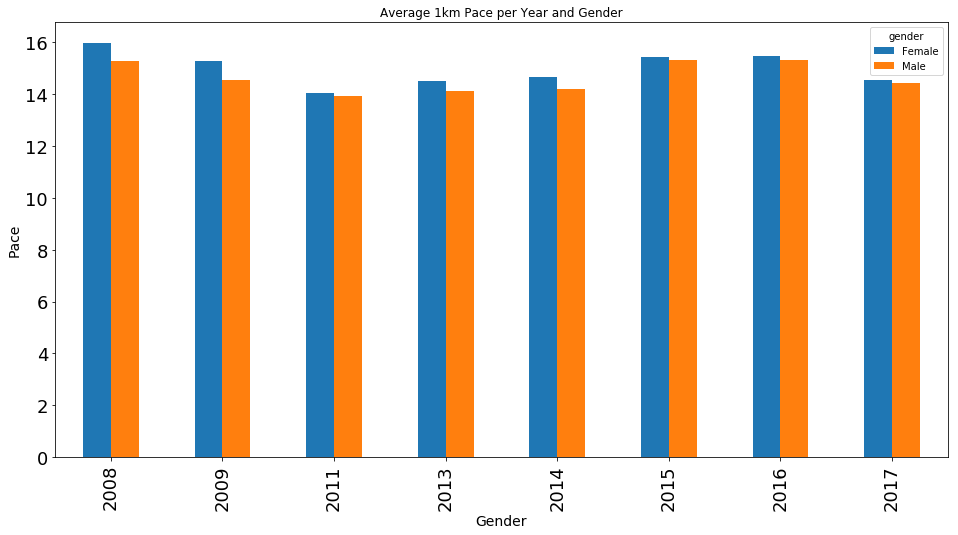

In [52]:
gen = df2.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()
ax = gen.plot.bar(figsize=(16, 8), title='Average 1km Pace per Year and Gender', fontsize=18)
ax.set_ylabel('Pace', fontsize = 14)
ax.set_xlabel('Gender', fontsize = 14)

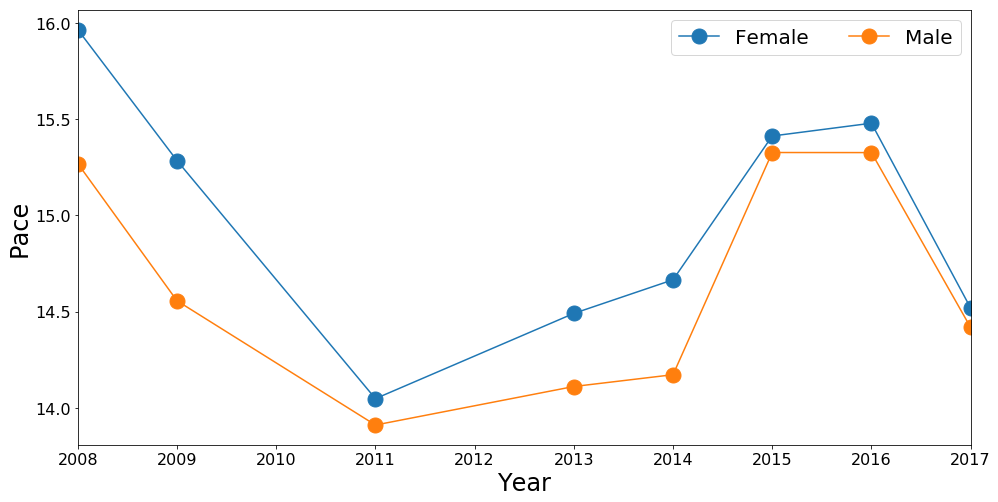

In [65]:
gen = df2.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()
ax = gen.plot(figsize=(16, 8), fontsize=16, marker='o', ms=15)
ax.set_ylabel('Pace', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend(['Female', 'Male'], frameon=True, ncol=2, loc='upper right', fontsize = 20)

Average pace per segment for each gender

In [59]:
df3 = df2.drop(['Unnamed: 0', 'Year', 'bib', 'rank', 'timediff'], axis = 1)
df3.groupby(['gender']).mean()


,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,AVG_Pace
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,9.188753,5.815202,8.912459,8.170574,20.797431,10.447478,12.84581,18.833664,11.270410,15.268378,13.072465,19.616997,10.542569,12.829711,39.511033,24.419216,25.908398,13.475846,13.891228,24.204883,11.610155,14.216229,19.445159,17.340746,19.799464,16.872576,18.367066,14.672473,24.314219,21.390117,12.817190,17.732993,22.267035,12.349757,19.474383,16.503542,12.786718,19.618999,11.723372,2437.422277,14.977206
Male,8.828722,5.359172,8.402370,7.707921,18.829374,10.258319,12.89521,18.052616,10.554617,14.954484,12.479483,19.060561,10.115388,12.236909,44.415310,23.315693,25.921626,12.840577,13.580807,23.255737,11.101619,13.713035,19.144790,18.074315,19.497591,15.956563,18.560640,14.155001,23.865190,21.660488,12.470266,17.643835,21.693646,12.704223,20.564701,15.905220,12.860820,19.328797,11.398679,2382.655319,14.643738


## Category pacing

Text(0.5,0.98,'Average 1km pace per Category')

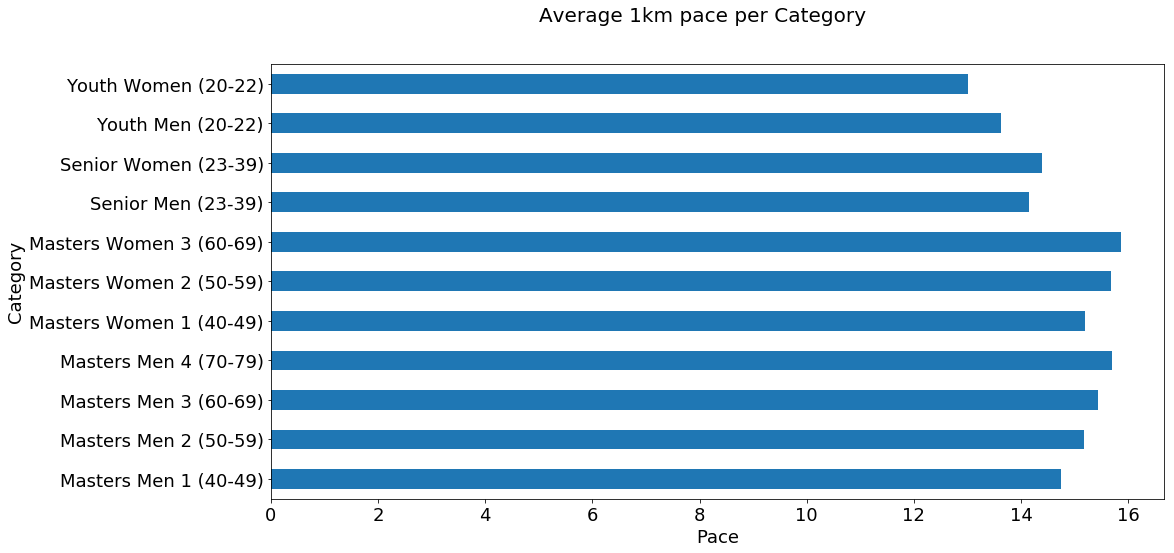

In [60]:
fig = plt.figure()
cate = df2.groupby(['category'])['AVG_Pace'].mean()
ax = cate.plot.barh(figsize=(16, 8), fontsize=18)
ax.set_ylabel('Category', fontsize = 18)
ax.set_xlabel('Pace', fontsize = 18)
fig.suptitle('Average 1km pace per Category', fontsize=20)

In [61]:
df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()

category,Masters Men 1 (40-49),Masters Men 2 (50-59),Masters Men 3 (60-69),Masters Men 4 (70-79),Masters Women 1 (40-49),Masters Women 2 (50-59),Masters Women 3 (60-69),Senior Men (23-39),Senior Women (23-39),Youth Men (20-22),Youth Women (20-22)
Year,,,,,,,,,,,
2008,15.219446,16.069151,16.860478,16.300771,15.979953,17.762355,20.402246,14.705306,14.881370,16.133524,NaN
2009,14.519854,14.917460,15.682146,17.233486,15.590264,15.909166,15.581760,14.323954,14.697284,12.060739,10.619380
2011,14.020157,14.432422,14.617289,15.084842,14.041723,14.883851,14.254315,13.366918,13.694225,13.262452,NaN
2013,14.155329,14.677306,15.147856,15.699459,14.673311,15.061591,13.222408,13.639098,14.028055,12.804842,NaN
2014,14.288728,14.646242,14.878361,14.565632,15.100177,15.491850,15.153533,13.718831,13.821354,14.794885,15.396576
2015,15.526962,15.850825,15.984011,14.748255,15.438017,15.633701,16.890534,14.708345,15.195767,11.109057,NaN
2016,15.547641,15.820563,15.319965,16.913239,15.746919,15.870647,16.377757,14.776019,15.013995,15.955317,NaN
2017,14.600492,14.912843,14.546463,15.714150,14.941314,15.282497,14.439218,13.874850,13.725776,11.894848,NaN


In [66]:
groups = df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()

In [69]:
Males = groups.filter(like = 'Men')

In [71]:
Females = groups.filter(like='Women')

Text(0.5,0.98,'Average 1km pace per Category')

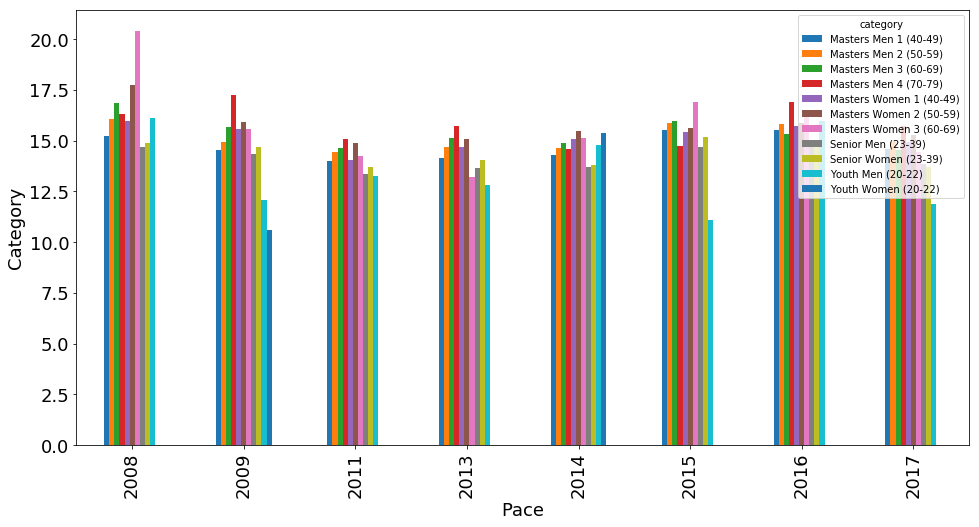

In [62]:
fig = plt.figure()
cate = df2.groupby(['Year','category'])['AVG_Pace'].mean().unstack()
ax = cate.plot.bar(figsize=(16, 8), fontsize=18)
ax.set_ylabel('Category', fontsize = 18)
ax.set_xlabel('Pace', fontsize = 18)
fig.suptitle('Average 1km pace per Category', fontsize=20)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "upper centre". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


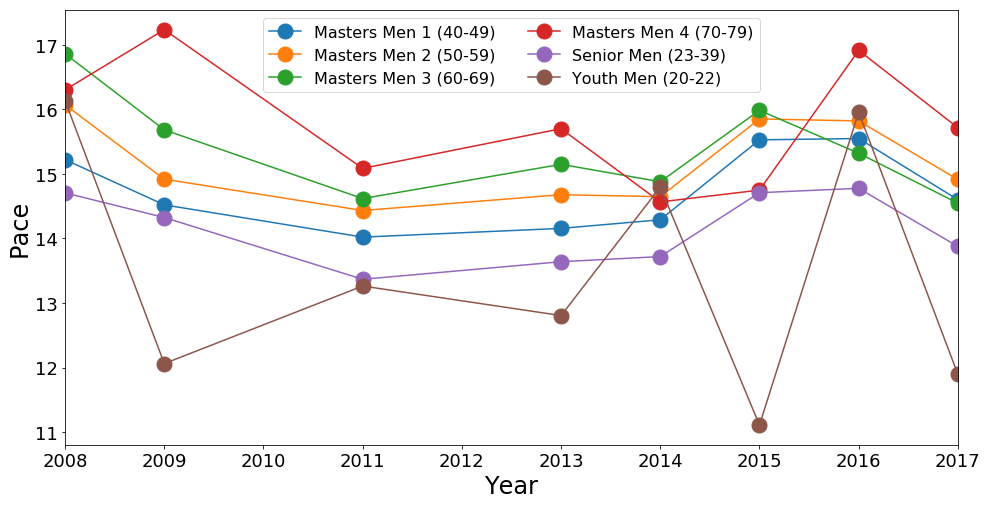

In [78]:
cate = df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()
ax = Males.plot(figsize=(16, 8), fontsize=18, marker='o', ms=15)
ax.set_ylabel('Pace', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend( frameon=True, ncol=2, loc='upper centre', fontsize=16)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "upper centre". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


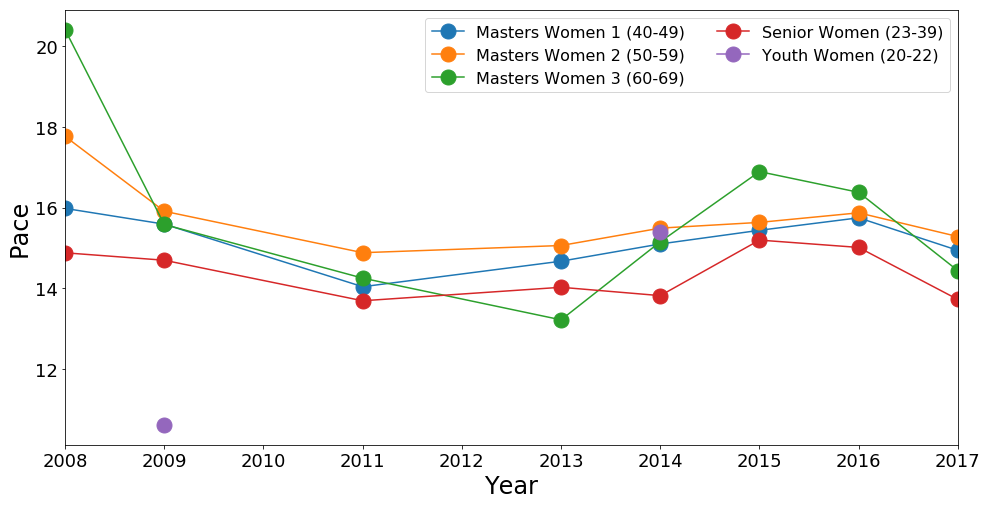

In [79]:
cate = df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()
ax = Females.plot(figsize=(16, 8), fontsize=18, marker='o', ms=15)
ax.set_ylabel('Pace', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend( frameon=True, ncol=2, loc='upper centre', fontsize=16)

Average pace per segment for each category

In [63]:
df3.groupby(['category']).mean()

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,AVG_Pace
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Masters Men 1 (40-49),8.876084,5.320079,8.371755,7.742214,18.701904,10.309333,12.974513,18.157314,10.589659,15.072919,12.573731,19.161814,10.156191,12.277610,45.867489,23.466360,26.133451,12.893214,13.644322,23.407666,11.157886,13.812568,19.211753,18.149827,19.680755,15.948171,18.630862,14.280948,23.867437,21.959272,12.522658,17.876944,21.758247,12.663345,20.726541,15.936305,12.822736,19.380889,11.371811,2399.060143,14.743119
Masters Men 2 (50-59),9.238327,5.621680,8.813993,8.283381,21.554237,10.850690,13.538228,19.086414,11.427352,15.626006,13.202991,19.992413,10.632620,12.977360,43.603347,24.966831,27.009650,13.627850,14.322395,24.315644,11.720322,14.515719,19.963411,18.160491,20.245066,16.856259,18.648498,15.157010,24.657020,22.598254,12.869278,18.154138,22.280077,12.931339,20.925244,16.185691,13.020716,20.062934,11.767513,2483.247488,15.170742
Masters Men 3 (60-69),9.721549,5.978952,9.373872,9.036433,23.510135,11.448181,14.085135,20.047334,12.545752,16.160921,13.546738,20.662425,11.203139,13.582592,39.184656,26.222619,27.565909,14.353144,14.801113,24.979651,12.492356,15.219549,20.408535,18.378398,20.832771,17.974577,18.999071,15.986174,25.078529,21.061966,13.207210,18.667551,22.819162,12.739177,22.548164,17.693079,13.464058,19.902381,12.185992,2529.613115,15.440366
Masters Men 4 (70-79),10.232790,5.918841,9.112016,9.930492,22.844444,11.656380,14.581009,21.194909,14.582202,16.933798,13.155427,21.375992,11.889947,15.583943,16.333333,25.066667,26.640671,15.135586,15.738889,26.240432,13.331944,14.854932,18.789001,NaN,24.017699,14.814815,NaN,16.022109,27.020755,NaN,13.052778,NaN,23.196429,NaN,NaN,17.569444,NaN,NaN,13.805180,2471.595833,15.695906
Masters Women 1 (40-49),9.294630,5.933902,8.947006,8.332899,20.529527,10.585908,13.072737,19.016965,11.546553,15.577407,13.319380,20.003995,10.820571,13.116596,39.678157,24.205961,26.592764,13.817836,14.199637,24.446640,11.875722,14.472216,20.240620,17.725900,19.848218,17.340797,18.558282,14.841602,24.629189,21.839481,13.128231,18.144432,22.383551,12.355085,19.533599,16.367579,12.517738,19.636768,11.839061,2479.483669,15.198410
Masters Women 2 (50-59),9.775139,6.332609,9.320553,8.892514,22.919658,11.175782,13.604442,20.157938,12.289849,16.103655,13.552082,20.699339,11.171914,13.832499,42.353667,27.955254,27.328361,14.200403,14.571164,25.309643,12.344603,15.152341,19.940208,18.057786,20.958146,17.445106,18.314281,16.259440,24.843762,23.349479,12.949377,18.853448,22.771277,12.638889,19.881532,17.482848,13.600096,20.963929,12.360826,2557.299749,15.685825
Masters Women 3 (60-69),10.430614,NaN,9.677003,9.731934,38.873611,11.564523,13.673231,22.003719,13.077498,15.689950,16.500756,21.394853,11.564352,14.787348,29.155093,26.456667,25.845967,14.886074,15.911592,25.025926,12.674815,15.991071,18.902357,19.940389,21.492257,18.022046,16.111111,16.663265,25.963050,NaN,13.864583,NaN,22.918677,14.566138,NaN,18.317460,15.547893,NaN,13.232304,2619.093750,15.869016
Senior Men (23-39),8.455715,5.237286,8.142656,7.220535,16.860130,9.757990,12.341523,17.190762,9.861474,14.347503,11.902

In [ ]:
df2.head()

In [ ]:
df2.to_csv('../../data/1km_splits_full.csv')